In [2]:
import numpy as np
import matplotlib.pyplot as plt


-2.0613374827624333e-07


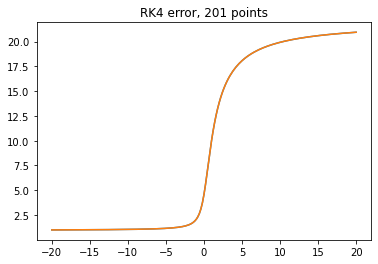

In [154]:

def f(x,y): #y''=-y
    return y/(1+x**2)

def rk4(fun,x,y,h):

    eval = fun(x,y)

    k1=eval*h
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    y1= y + (k1+2*k2+2*k3+k4)/6

    k5=eval*h/2
    k6=h/2*fun(x+h/4,y+k5/2)
    k7=h/2*fun(x+h/4,y+k6/2)
    k8=h/2*fun(x+h/2,y+k7)
    y2_1= y + (k5+2*k6+2*k7+k8)/6

    k9=fun(x+h/2,y2_1)*h/2
    k10=h/2*fun(x+3*h/4,y2_1+k9/2)
    k11=h/2*fun(x+3*h/4,y2_1+k10/2)
    k12=h/2*fun(x+h,y2_1+k11)
    y2_2 = y2_1 + (k9+2*k10+2*k11+k12)/6

    return y2_2+(y2_2-y1)/15

npt=201
x=np.linspace(-20,20,npt)
y=np.zeros([2,npt])
y[0,0]=1 #starting conditions
y[1,0]=0 #if I start at peak, then first derivative =0
for i in range(npt-1):
    h=x[i+1]-x[i]
    y[:,i+1]= rk4(f,x[i],y[:,i],h)

c = 1/(np.exp(np.arctan(-20)))
truth=c*np.exp(np.arctan(x))


print(np.mean(truth-y[0,:]))

plt.ion()
plt.plot(x,y[0,:])
plt.plot(x,truth)
plt.title('RK4 error, ' + repr(npt)+ ' points')
plt.savefig('rk4_err.png')



In [151]:
1/2+1/4-3/4

0.0